In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%run My_function.ipynb

<div class="oc-richContent root-0-2-1" data-videotitle="video" data-current-user-id="328418" data-project-id="863" data-codio-button-label="Accéder au code"><p>&nbsp;</p>
<p><img src="https://user.oc-static.com/upload/2023/03/15/16788718737642_Banner-Sce%CC%81nario.png" alt="Bannière scénario"></p>

<p>Vous êtes consultant Data Analyst dans une entreprise spécialisée dans la data. Votre entreprise a décroché une prestation en régie au sein de l’Organisation nationale de lutte contre le faux-monnayage (ONCFM).</p>
<p>&nbsp;</p>
<figure><a href="https://user.oc-static.com/upload/2020/11/25/16063163322759_Screen%20Shot%202020-11-05%20at%2011.15.15.png" class="oc-imageLink oc-imageLink--disabled"><img src="https://user.oc-static.com/upload/2020/11/25/16063163322759_Screen%20Shot%202020-11-05%20at%2011.15.15.png" alt=""></a></figure>
<p>&nbsp;</p>
<p>Cette institution a pour objectif de mettre en place des méthodes d’identification des contrefaçons des billets en euros. Ils font donc appel à vous, spécialiste de la data, pour mettre en place une modélisation qui serait capable d’identifier automatiquement les vrais des faux billets. Et ce à partir simplement de certaines dimensions du billet et des éléments qui le composent.</p>
<p>Voici <a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P10-cdc-detection-faux-billets.pdf">le cahier des charges de l’ONCFM</a>, ainsi que&nbsp;<a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/billets.csv">le jeu de données</a>.</p>
<p>Le client souhaite que vous travailliez directement depuis ses locaux sous la responsabilité de Marie, responsable du projet d’analyse de données à l’ONCFM. Elle vous laissera une grande autonomie pendant votre mission, et vous demande simplement que vous lui présentiez vos résultats une fois la mission terminée. Elle souhaite voir quels sont les traitements et analyses que vous avez réalisés en amont, les différentes pistes explorées pour la construction de l’algorithme, ainsi que le modèle final retenu.</p>
<p>Après avoir lu en détail le cahier des charges, vous vous préparez à vous rendre à l’ONCFM pour prendre vos nouvelles fonctions. Vous notez tout de même un post-it qui se trouve sur le coin de votre bureau, laissé par un de vos collègues :</p>
<figure><a href="https://user.oc-static.com/upload/2020/11/25/16063165227448_De%CC%81tectez%20des%20faux%20billets%20-%20post%20it.png" class="oc-imageLink oc-imageLink--disabled"><img src="https://user.oc-static.com/upload/2020/11/25/16063165227448_De%CC%81tectez%20des%20faux%20billets%20-%20post%20it.png" alt="Lors de ma précédente mission, je me suis retrouvé avec un jeu de données comportant plein de valeurs manquantes, une vraie galère&nbsp;! Mais j’ai eu de très bons résultats en utilisant une régression linéaire pour combler ces dernières. Ça te servira peut-être pour ta prochaine mission, qui sait&nbsp;?"></a></figure>
<p>Vous embarquez le post-it dans vos affaires et vous dirigez donc à présent vers les bureaux de l’ONCFM pour commencer votre mission.</p>

<p><img src="https://user.oc-static.com/upload/2023/03/15/16788719253125_Banner-Livrables.png" alt="Bannière livrables"></p>

<ul>
<li>Votre code en R ou Python contenant :&nbsp;</li>
<ul>
<li>l’ensemble des traitements et des tests effectués ;</li>
<li>l’application finale.</li>
</ul>
</ul>
<aside data-claire-semantic="information">
<p>Pour faciliter votre passage devant le jury, déposez sur la plateforme, dans un dossier zip nommé “<strong><em>Titre_du_projet_nom_prénom</em></strong>”, le livrable du projet nommé comme suit : <strong>Nom</strong>_<strong>Prénom</strong>_<strong>n° du livrable</strong>_<strong>nom du livrable</strong>_<strong>date de démarrage du projet</strong>. Cela donnera :&nbsp;</p>
<ul>
<li><em>Nom_Prénom_1_code_mmaaaa</em></li>
</ul>
<p>Par exemple, le livrable peut être nommé comme suit <em>: Dupont_Jean_1_code</em>_<em>012023.</em></p>
</aside>

<p><img src="https://user.oc-static.com/upload/2023/03/15/16788719600459_Banner-Soutenance.png" alt="Bannière soutenance"></p>
<p>Durant la présentation orale, votre mentor jouera le rôle de Marie, la responsable du projet à l’ONCFM à qui vous présentez vos résultats :&nbsp;</p>
<ul>
<li><strong>Présentation des livrables (20 minutes)&nbsp;</strong>
<ul>
<li>Présentation de l’ensemble de votre cheminement, des traitements et analyses réalisés en amont, des différentes pistes explorées pour la construction de l’algorithme, et du modèle final retenu (15 minutes) ;</li>
<li>Test de l’algorithme en direct avec un jeu de données qui vous sera fourni pendant la soutenance, ayant la même forme que le jeu suivant : <a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/billets_production.csv">FICHIER billets_production.csv</a>&nbsp;(5&nbsp;minutes).</li>
</ul>
</li>
<li><strong>Discussion (5 minutes)</strong>
<ul>
<li>Échange de questions/réponses : l’évaluateur pourra revenir sur certains points pour vous questionner sur vos choix.</li>
<li>L’évaluateur vous fera un retour sur votre prestation en soutenance.</li>
</ul>
</li>
<li><strong>Debriefing (5 minutes)</strong></li>
<ul>
<li>À la fin de la soutenance, l'évaluateur arrêtera de jouer le rôle de Marie pour vous permettre de débriefer ensemble.</li>
</ul>
</ul>


# Récupération des données

In [3]:
data = pd.read_csv("Données/billets.csv",sep=";")

# Exploration des données

## Exploration

In [4]:
data

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

In [5]:
# On réalise une rapide analyse de nos données. On constate qu'il y a des valeurs manquantes dans la colonnes margin_low
my_first_analyse(data, graphique=False)

observations  variables     type    moyennes  medianes  \
is_genuine            1500          7     bool    0.666667      1.00   
diagonal              1500          7  float64  171.958440    171.96   
height_left           1500          7  float64  104.029533    104.04   
height_right          1500          7  float64  103.920307    103.92   
margin_low            1500          7  float64    4.485967      4.31   
margin_up             1500          7  float64    3.151473      3.14   
length                1500          7  float64  112.678500    112.96   

              ecart_types     min     max  nb_valeurs_manquantes  \
is_genuine       0.471562   False    True                      0   
diagonal         0.305195  171.04  173.01                      0   
height_left      0.299462  103.14  104.88                      0   
height_right     0.325627  102.82  104.95                      0   
margin_low       0.663813    2.98     6.9                     37   
margin_up        0.231813    2.27    3.91                      0   
length           0.872730  109.49  114.44                      0   

              %_valeurs_manquantes  
is_genuine                    0.00  
diagonal                      0.00  
height_left                   0.00  
height_right                  0.00  
margin_low                    2.47  
margin_up                     0.00  
length                        0.00

In [6]:
# Vérification du nombre de faux billets
print("Le nombre de vrai billets est de :",data.loc[data["is_genuine"]==True]["is_genuine"].count())
print("Le nombre de faux billets est de :",data.loc[data["is_genuine"]==False]["is_genuine"].count())

Le nombre de vrai billets est de : 1000
Le nombre de faux billets est de : 500


In [7]:
print("Information concernant les vrais billets :")
my_exploration(data.loc[data["is_genuine"]==True])
print("Information concernant les faux billets :")
my_exploration(data.loc[data["is_genuine"]==False])

Information concernant les vrais billets :


diagonal  height_left  height_right  margin_low   margin_up  \
count  1000.000000  1000.000000    1000.00000  971.000000  1000.00000   
mean    171.987080   103.949130     103.80865    4.116097     3.05213   
std       0.300441     0.300231       0.29157    0.319124     0.18634   
min     171.040000   103.140000     102.82000    2.980000     2.27000   
25%     171.790000   103.740000     103.61000    3.905000     2.93000   
50%     171.990000   103.950000     103.81000    4.110000     3.05000   
75%     172.200000   104.140000     104.00000    4.340000     3.18000   
max     172.920000   104.860000     104.95000    5.040000     3.74000   

            length  
count  1000.000000  
mean    113.202430  
std       0.359552  
min     111.760000  
25%     112.950000  
50%     113.205000  
75%     113.460000  
max     114.440000

Information concernant les faux billets :


diagonal  height_left  height_right  margin_low   margin_up  \
count  500.000000   500.000000    500.000000  492.000000  500.000000   
mean   171.901160   104.190340    104.143620    5.215935    3.350160   
std      0.306861     0.223758      0.270878    0.553531    0.180498   
min    171.040000   103.510000    103.430000    3.820000    2.920000   
25%    171.690000   104.040000    103.950000    4.840000    3.220000   
50%    171.910000   104.180000    104.160000    5.190000    3.350000   
75%    172.092500   104.332500    104.320000    5.592500    3.472500   
max    173.010000   104.880000    104.950000    6.900000    3.910000   

           length  
count  500.000000  
mean   111.630640  
std      0.615543  
min    109.490000  
25%    111.200000  
50%    111.630000  
75%    112.030000  
max    113.850000

In [8]:
# On calcule la différence de diagonale entre les vrais et les faux billets
diff_diag = (((data.loc[data["is_genuine"]==True]["diagonal"].mean())-(data.loc[data["is_genuine"]==False]["diagonal"].mean()))/(data.loc[data["is_genuine"]==True]["diagonal"].mean()))*100

# On calcule la différence de hauteur entre les vrais et les faux billets
diff_h_left = (((data.loc[data["is_genuine"]==True]["height_left"].mean())-(data.loc[data["is_genuine"]==False]["height_left"].mean()))/(data.loc[data["is_genuine"]==True]["height_left"].mean()))*100
diff_h_right = (((data.loc[data["is_genuine"]==True]["height_right"].mean())-(data.loc[data["is_genuine"]==False]["height_right"].mean()))/(data.loc[data["is_genuine"]==True]["height_right"].mean()))*100

# On calcule la différence de marge entre les vrais et les faux billets
diff_m_low = (((data.loc[data["is_genuine"]==True]["margin_low"].mean())-(data.loc[data["is_genuine"]==False]["margin_low"].mean()))/(data.loc[data["is_genuine"]==True]["margin_low"].mean()))*100
diff_m_up = (((data.loc[data["is_genuine"]==True]["margin_up"].mean())-(data.loc[data["is_genuine"]==False]["margin_up"].mean()))/(data.loc[data["is_genuine"]==True]["margin_up"].mean()))*100

# On calcule la différence de longeur entre les vrais et les faux billets
diff_length = (((data.loc[data["is_genuine"]==True]["length"].mean())-(data.loc[data["is_genuine"]==False]["length"].mean()))/(data.loc[data["is_genuine"]==True]["length"].mean()))*100

# Affichage des résultats sous forme de Tableau
pd.DataFrame(index=["Moyenne des écrats en %"],columns=["diagonale","height_left","height_right","margin_low","margin_up","length"],data=[[diff_diag, diff_h_left, diff_h_right, diff_m_low, diff_m_up, diff_length]])

diagonale  height_left  height_right  margin_low  \
Moyenne des écrats en %   0.049957    -0.232046      -0.32268  -26.720415   

                         margin_up    length  
Moyenne des écrats en %  -9.764656  1.388477

En comparant les données ci-dessus, on constate que : 
- Les vrais billets ont une diagonale légèrement plus importante
- Les faux billets ont hauteur et des marges lègèrement plus importante
- Les faux billets sont plus petit que les vrais billets.

## Visualisation des données

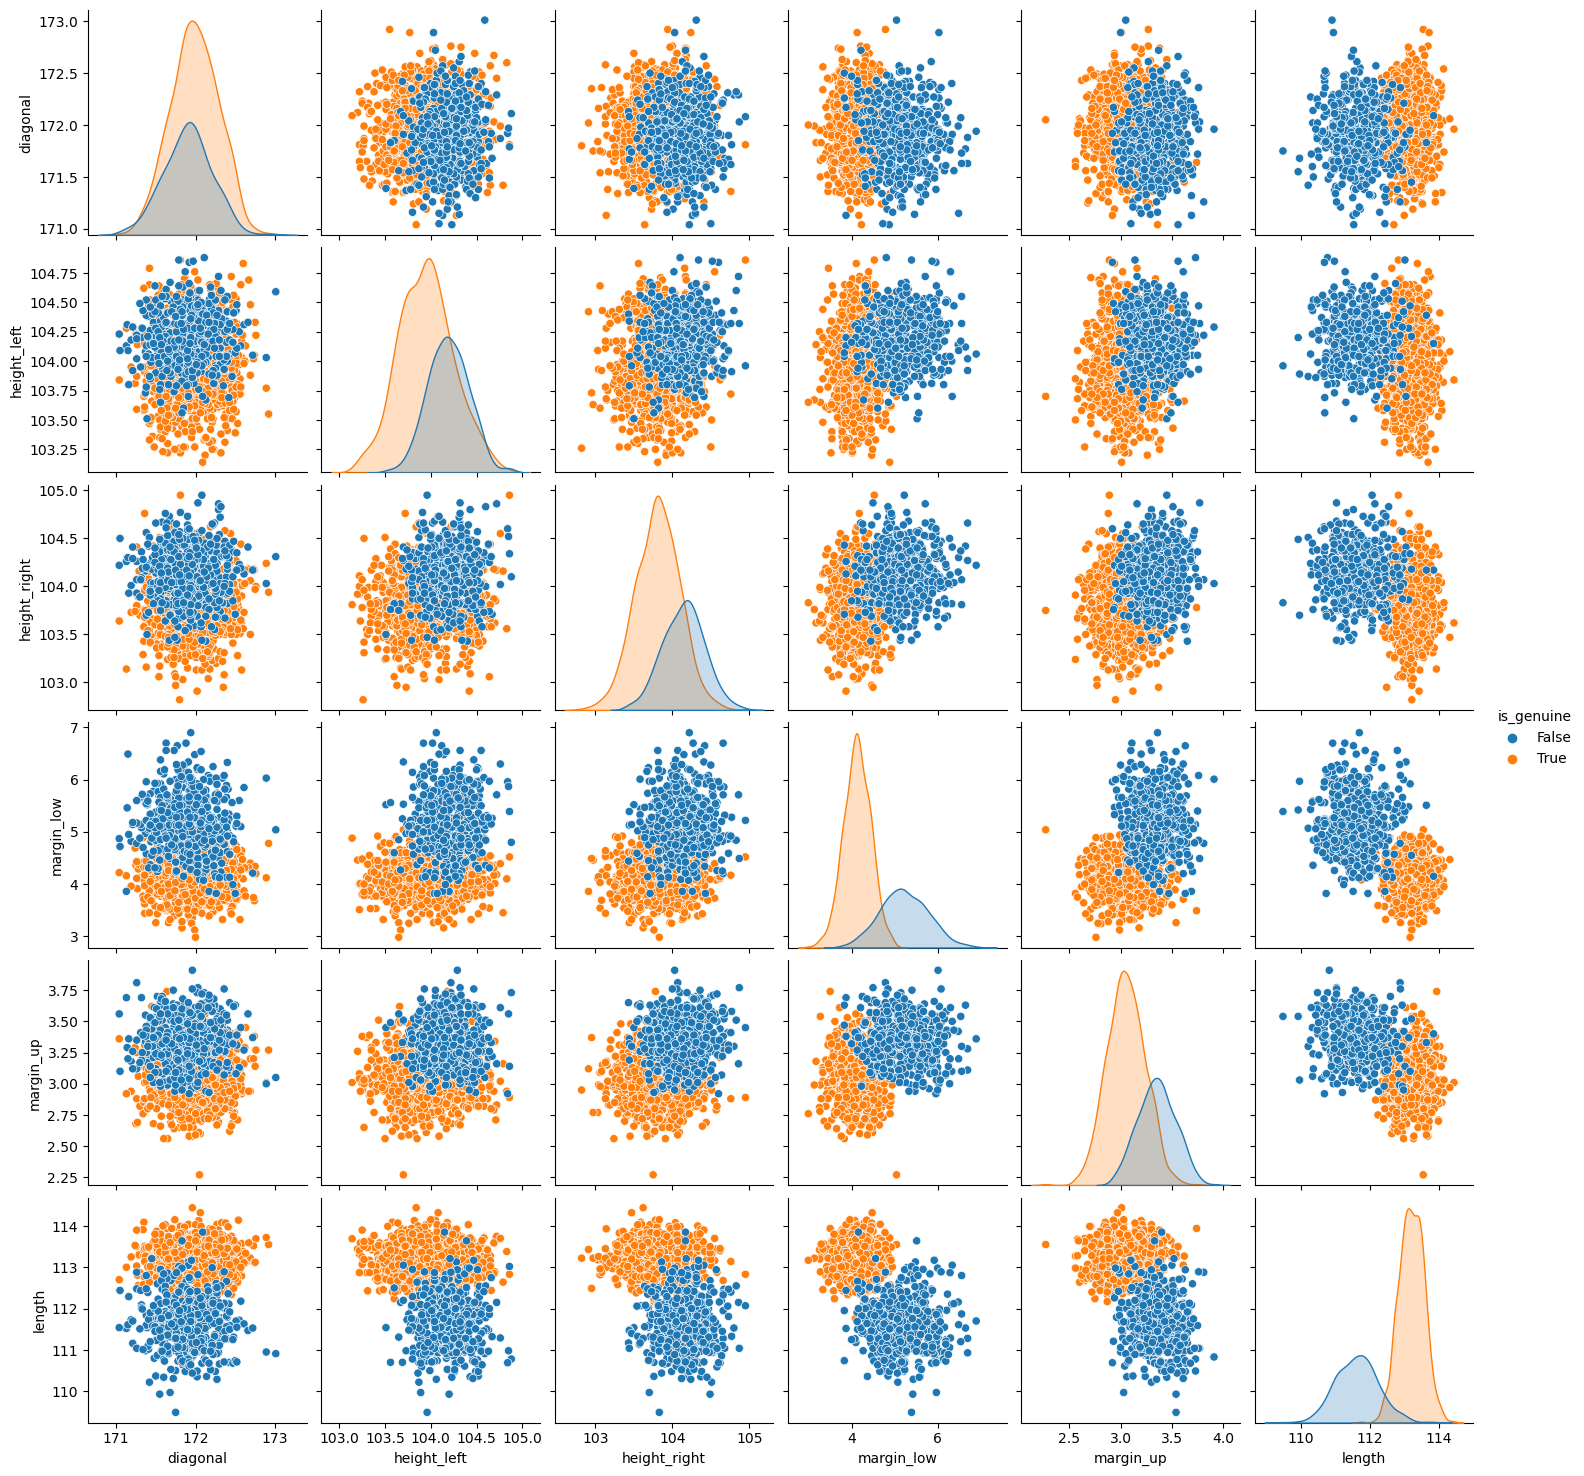

In [9]:
sns.pairplot(data, hue="is_genuine")

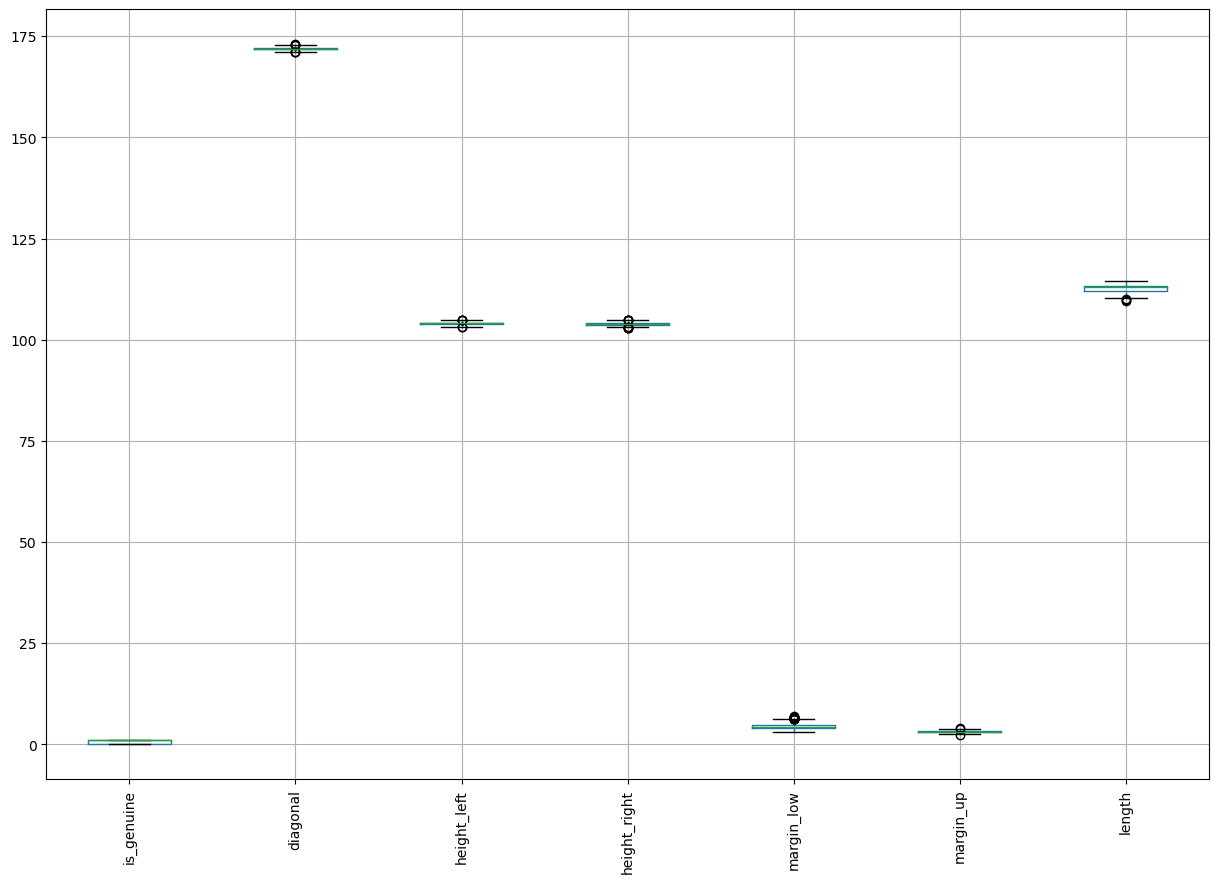

In [10]:
my_boxplots(data)

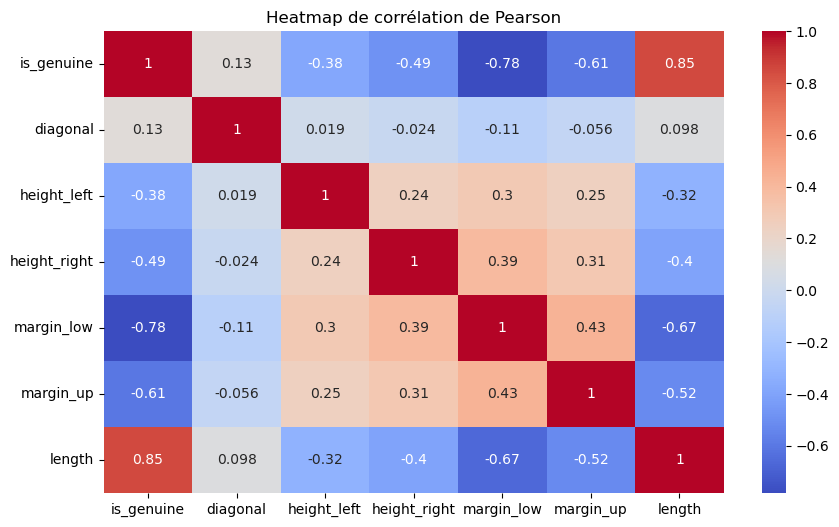

In [11]:
my_corr_heatmap(data)

# Nettoyage des données

In [12]:
# Commençons par changer le bool par du binaire pour la colonne is_genuine
data["is_genuine"].replace([True, False], [1,0], inplace=True)

On va maintenant s'occuper des valeurs manquantes. En observant le pairplot précédent, on constate qu'il semble exister une relation entre la longeur et le margin_low. Plusieurs méthodes s'offrent à nous : 
- Supprimer ces individus (car ne représente (que) 2,47% des valeurs totales)
- Appliquer la moyenne 
- Appliquier la médianne
- Utiliser une methode me ML pour reconstituer ces données

Pour ce cas pratique, nous allons opter pour la dernière méthode. Maintenant, il ne nous reste plus qu'à trouver quelle méthode utiliser. 

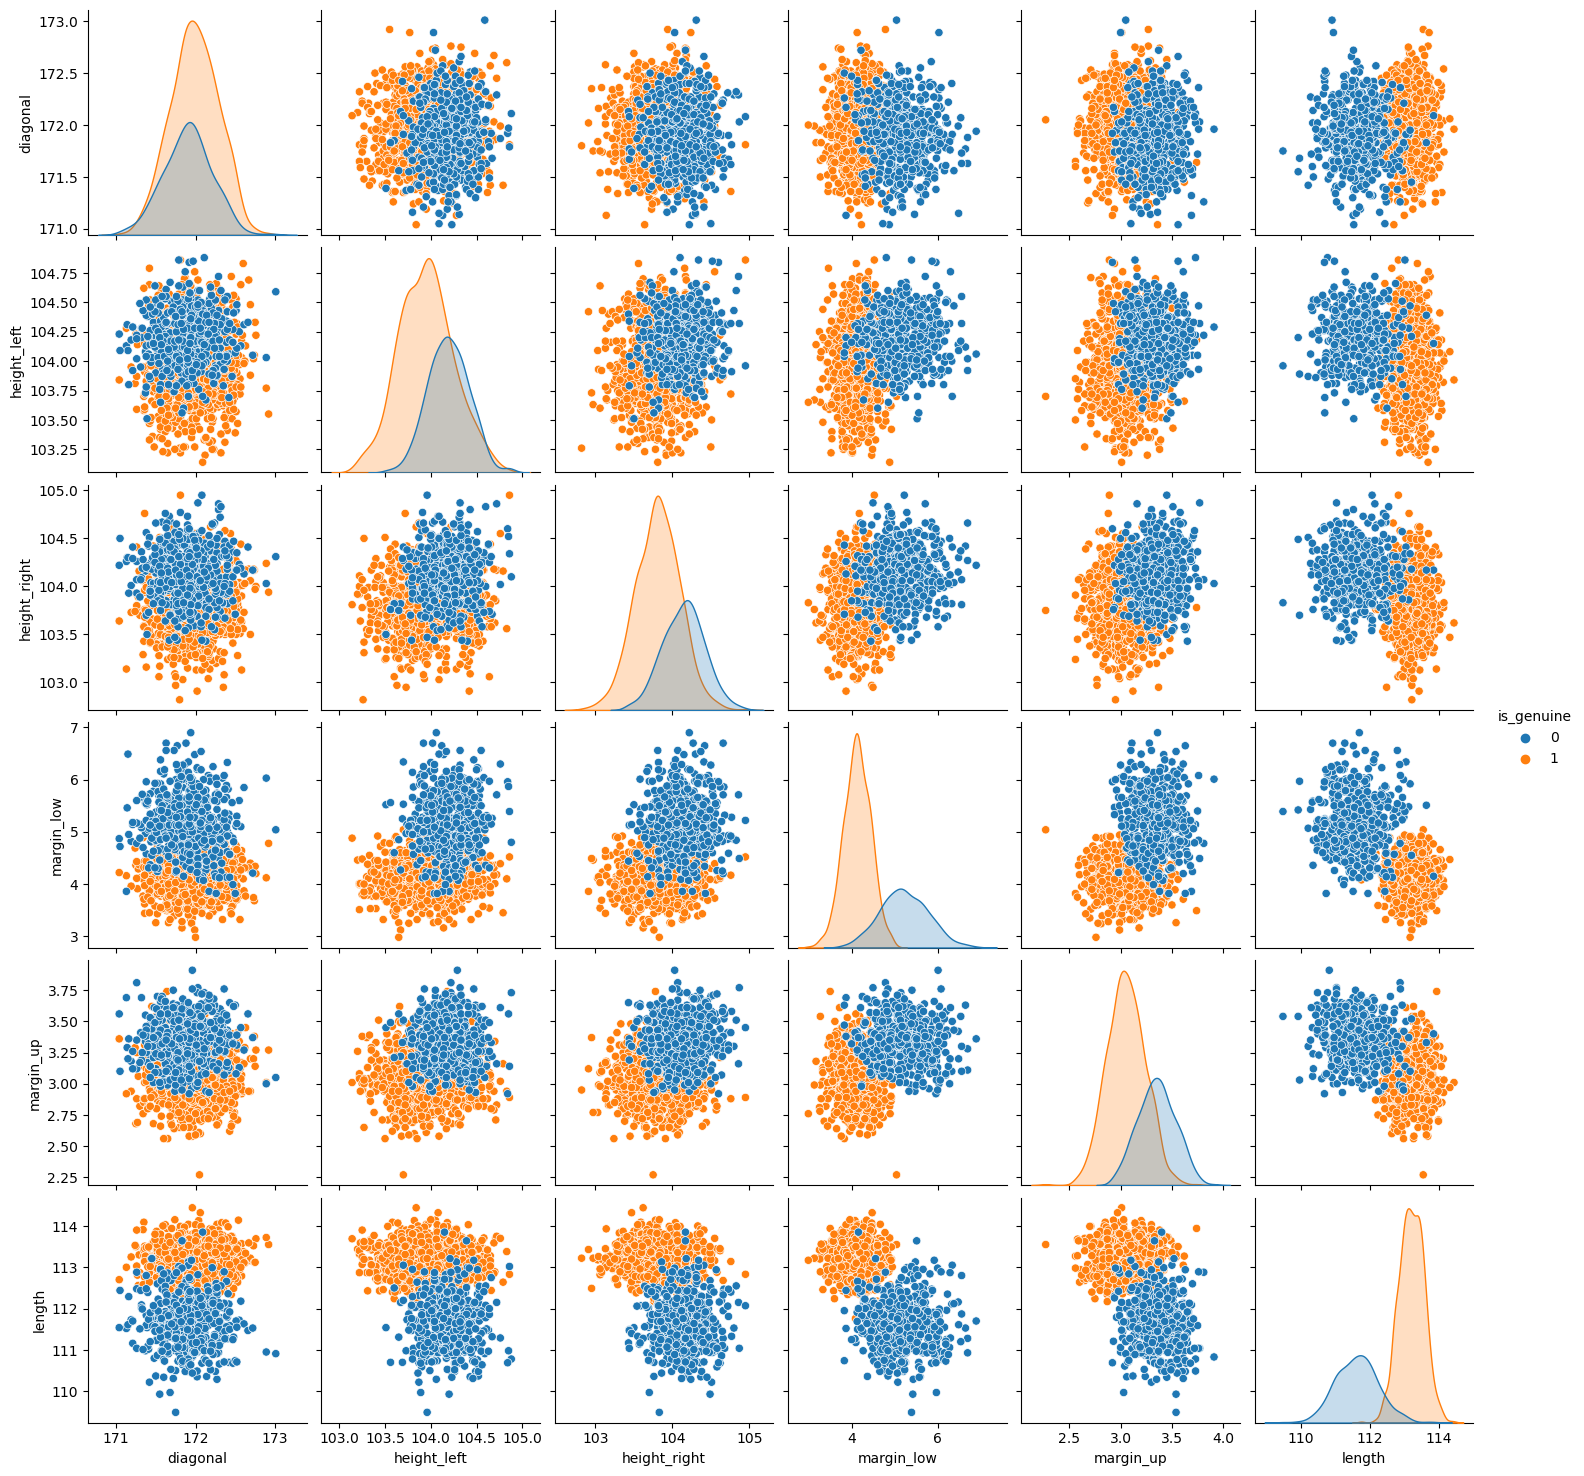

In [13]:
sns.pairplot(data, hue="is_genuine")
plt.show()

## Vérification des valeurs abérantess

Nous allons vérifier les données abérantes

In [14]:
my_outliers_zscore(data)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
251            1    171.80       103.26        102.82         NaN       2.95   
522            1    172.02       104.42        102.91        3.86       3.12   
664            1    172.05       103.70        103.75        5.04       2.27   
729            1    171.04       103.84        103.64        4.22       3.36   
828            1    172.92       103.55        103.94        4.78       3.27   
842            1    172.89       103.77        104.24        4.12       3.01   
1022           0    172.89       104.03        104.03        6.03       3.00   
1029           0    171.96       104.29        104.03        6.01       3.91   
1082           0    171.75       103.96        103.83        5.39       3.54   
1142           0    171.04       104.23        104.22        4.87       3.56   
1277           0    173.01       104.59        104.31        5.04       3.05   
1355           0    171.68       103.89        103.70        5.97       3.03   
1453           0    171.55       104.20        104.49        5.42       3.54   
1484           0    172.08       103.96        104.95        5.22       3.45   

      length  
0     112.83  
251   113.22  
522   113.43  
664   113.55  
729   112.70  
828   113.55  
842   113.72  
1022  110.95  
1029  110.83  
1082  109.49  
1142  111.54  
1277  110.91  
1355  109.97  
1453  109.93  
1484  112.07

Les données aberrantes ont une influence fortes sur les différentes modele ML que nous allons mettre en place. De ce fait, nous pourrions rétiere ces valeurs. 
Cependant, il est interessant de laisser les faux billets dans le DataSet afin de prendre en compte ces dimentions dans la détection de faux billets. Nous allons simplement retirer les vrais billets des outliers

In [15]:
# On affecte les outliers à une variable
outliers = my_outliers_zscore(data)

In [16]:
outliers = outliers.loc[outliers["is_genuine"]==True]

In [17]:
# On réalise une petite analyse des données outliers
my_first_analyse(outliers)

observations  variables     type    moyennes  medianes  \
is_genuine               7          7    int64    1.000000      1.00   
diagonal                 7          7  float64  172.075714    172.02   
height_left              7          7  float64  103.914286    103.77   
height_right             7          7  float64  103.750000    103.75   
margin_low               7          7  float64    4.423333      4.37   
margin_up                7          7  float64    2.981429      3.01   
length                   7          7  float64  113.285714    113.43   

              ecart_types     min     max  nb_valeurs_manquantes  \
is_genuine       0.000000    1.00    1.00                      0   
diagonal         0.658150  171.04  172.92                      0   
height_left      0.545156  103.26  104.86                      0   
height_right     0.741485  102.82  104.95                      0   
margin_low       0.439894    3.86    5.04                      1   
margin_up        0.356391    2.27    3.36                      0   
length           0.388195  112.70  113.72                      0   

              %_valeurs_manquantes  
is_genuine                    0.00  
diagonal                      0.00  
height_left                   0.00  
height_right                  0.00  
margin_low                   14.29  
margin_up                     0.00  
length                        0.00

In [18]:
# On créé une nouvelle table sans les outliers
data = data.drop(outliers.index, axis=0)

In [19]:
data

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1              1    171.46       103.36        103.66        3.77       2.99   
2              1    172.69       104.48        103.50        4.40       2.94   
3              1    171.36       103.91        103.94        3.62       3.01   
4              1    171.73       104.28        103.46        4.04       3.48   
5              1    172.17       103.74        104.08        4.42       2.95   
...          ...       ...          ...           ...         ...        ...   
1495           0    171.75       104.38        104.17        4.42       3.09   
1496           0    172.19       104.63        104.44        5.27       3.37   
1497           0    171.80       104.01        104.12        5.51       3.36   
1498           0    172.06       104.28        104.06        5.17       3.46   
1499           0    171.47       104.15        103.82        4.63       3.37   

      length  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
5     112.81  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1493 rows x 7 columns]

## Compléter les valeurs manquantes

### Régression Linéaire

On a constaté durant l'exploration des données que nous avions des valeurs manquantes dans la colonne "Margin_low".
Nous souhaitons pouvoir "prédire" ces données à l'aide d'un model de Machine Learning. Dans notre cas, nous allons tester le model de <b>Régression Linéaire</b>.

In [20]:
# On importe LinearRegression()
# Avec Sklearn
from sklearn.linear_model import LinearRegression

# Avec StatModel
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

On va commencer par séparer les individus qui ont une valeur manquante dans "Margin_low". Cela correspond à 37 individus. 

----

###### On va scaler nos données pour le test

In [21]:
data_base = data

In [22]:
data = my_data_scaler(data, columns=["diagonal","height_left","height_right","margin_low","margin_up","length"],method="log")

___

In [23]:
# On créé un Dataset avec les individus qui ont un marhin_low = NaN
data_vide = data.loc[data["margin_low"].isna()]

# On créé un Dataset sans les valeurs manquantes
data_non_vide = data.dropna()

In [114]:
# On définit nos valeurs X et y
X = data_non_vide.drop(["margin_low","length","height_left","height_right","diagonal","margin_up"], axis=1)
X = sm.add_constant(X)
y = data_non_vide["margin_low"].values.reshape(len(data_non_vide),1)

Les valeurs X on été déterminé après avoir réaliser plusieurs itérations de la fonctions OLS de StatModels afin de selectionner les variables avec une P-values < 0.005.

In [115]:
# On split notre jeu de donnée
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Avec Sklearn

In [116]:
# On créé notre model
model = LinearRegression()
# On rentraine notre model
model.fit(X_train,y_train)
# On test le score de notre model sur le Test_Set
model.score(X_test,y_test)

0.6063775768303812

In [117]:
y_pred = model.predict(X_test)

#### Avec StatModels

In [118]:
# On split notre jeu de donnée

model = sm.OLS(y_test, X_test)
resultat = model.fit()

print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     451.2
Date:                Mon, 15 May 2023   Prob (F-statistic):           4.83e-61
Time:                        19:10:28   Log-Likelihood:                 360.59
No. Observations:                 292   AIC:                            -717.2
Df Residuals:                     290   BIC:                            -709.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8183      0.007    260.033      0.0

#### Vérification des hypothèses

Avant de valider l'utilisation de la régression linéaire, nous devons vérifier plusieurs hypothèses afin de s'assurer que nous pouvons appliquer cette régression. Voici les hypothèses à vérifier : 
- <b>Linéarité</b> : L'hypothèse de base de la régression linéaire est que la relation entre les variables indépendantes et dépendantes est linéaire.
- <b>Indépendance</b> : Les observations doivent être indépendantes les unes des autres. En d'autres termes, il ne devrait pas y avoir de corrélation ou de dépendance entre les observations.
- <b>Homoscédasticité</b> : L'homoscédasticité signifie que la variance des erreurs résiduelles est constante à tous les niveaux de la variable prédite.
- <b>Normalité</b> : Les erreurs résiduelles doivent être distribuées normalement. Cela signifie que les résidus doivent suivre une distribution normale avec une moyenne de zéro.

##### Linéarité

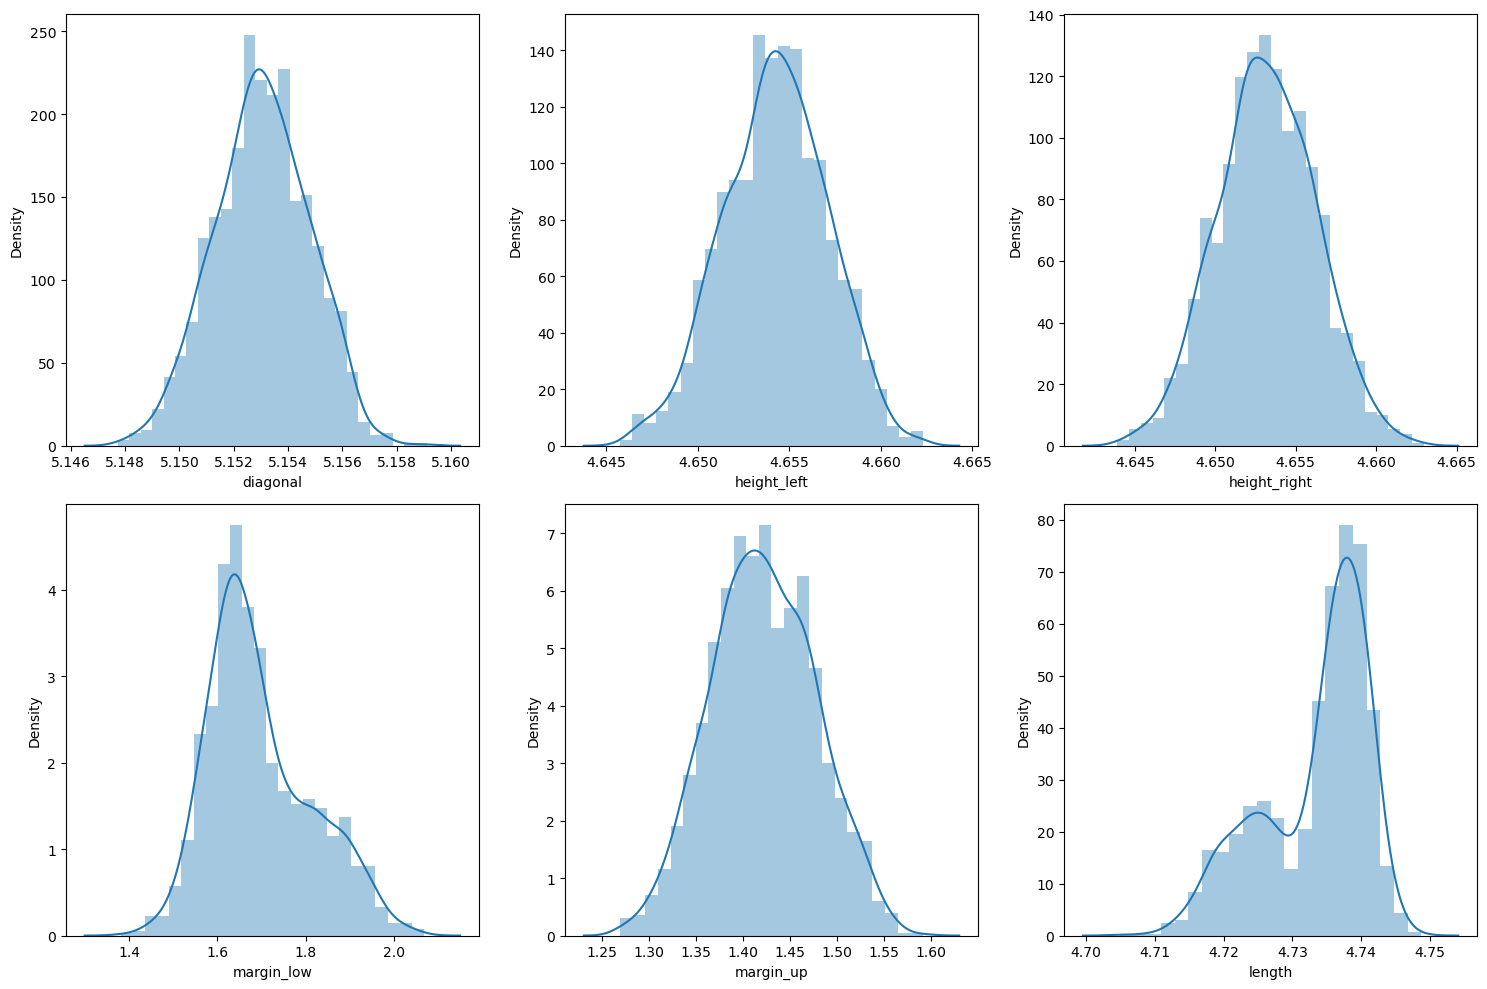

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    sns.distplot(data.iloc[:, i+1], ax=ax)

plt.tight_layout()
plt.show()

<b>Graphique : Résidus en fonction des valeurs ajustées</b>

On trace les résidus en fonction des valeurs ajustées (les Ŷ). Le tracé rouge doit être approximativement horizontal s’il y a bien une relation linéaire. Ce tracé est un ajustement du nuage de points qui utilise une méthode de régression non-linéaire appelée régression locale ou LOESS. 

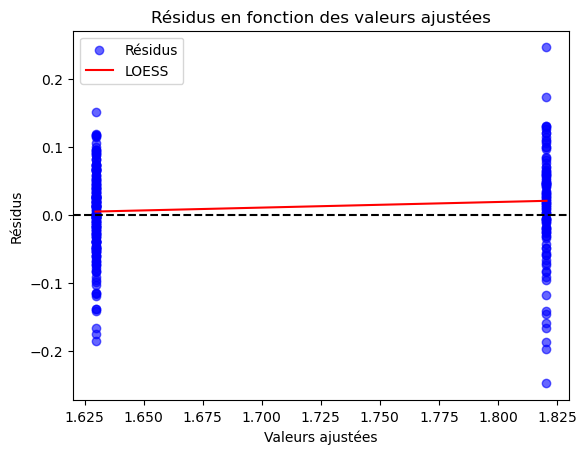

In [30]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Calcul des résidus
residuals = y_test - y_pred

# Calcul du LOESS
smoothed = lowess(residuals.flatten(), y_pred.flatten())

# Tracé des résidus en fonction des valeurs ajustées
plt.scatter(y_pred, residuals, color='b', alpha=0.6, label='Résidus')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='r', label='LOESS')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus')
plt.legend()
plt.title('Résidus en fonction des valeurs ajustées')
plt.show()

Le tracé rouge semble relativement horizontal. Nous allons pouvoir vérifier cela par le <b>Test de Rainbow</b>

In [31]:
from statsmodels.stats.diagnostic import linear_rainbow

In [32]:
# Ajustement du modèle de régression linéaire
model = sm.OLS(y_test, X_test)
results = model.fit()

# Calcul du test de linéarité de Rainbow
rainbow_statistic, rainbow_p_value = linear_rainbow(results)

print("Rainbow Test Statistic:", rainbow_statistic)
print("Rainbow Test p-value:", rainbow_p_value)

Rainbow Test Statistic: 0.7462967547857238
Rainbow Test p-value: 0.9605115299369685


Le Rainbow test nus indique un p-value supérieur à 0.005. En d'autres termes, nous ne pouvons pas rejeter l'hypothèse nulle de linéarité. Le test n'a pas détecté suffisamment d'évidence pour conclure que votre modèle de régression linéaire ne représente pas correctement une relation linéaire entre les variables indépendantes et la variable dépendante.

------

##### Indépendance des résidus 

In [33]:
import statsmodels.graphics.tsaplots as tsaplots

In [34]:
# Obtention des résidus de la régression
residuals = resultat.resid

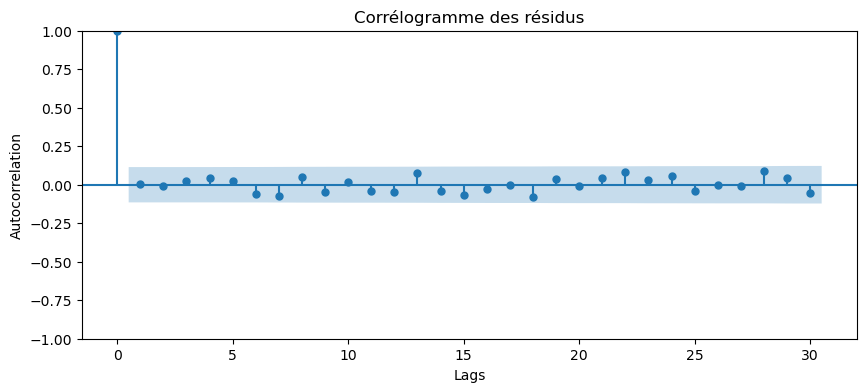

In [35]:
# Tracé du corrélogramme
fig, ax = plt.subplots(figsize=(10, 4))
tsaplots.plot_acf(residuals, ax=ax, lags=30)
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation')
ax.set_title('Corrélogramme des résidus')
plt.show()

Le graphique affiche les barres de corrélation pour chaque retard (lag), ainsi que des intervalles de confiance en pointillés bleus pour évaluer la significativité des coefficients de corrélation. Si une barre dépasse les intervalles de confiance, cela indique une corrélation significative et suggère la présence d'autocorrélation dans les résidus.<br/><br/>
Dans notre cas, nous pouvons constater qu'il existe plusieurs corrélation significative d'ordre 1 qui suggère la présence d'autocorrélation dans les résidus. Ainsi , les résidus ne sont pas indépendants. 

Vérifier l'autocorélation 

<b>Test de Ljung-Box</b>

In [36]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [37]:
# Test de Ljung-Box
lb_test = acorr_ljungbox(residuals, lags=30)

# Récupération des statistiques de test (Q) et des p-values
lb_statistic = lb_test["lb_stat"]
lb_pvalue = lb_test["lb_pvalue"]

# Affichage des résultats
for lag, statistic, pvalue in zip(range(1, len(lb_statistic) + 1), lb_statistic, lb_pvalue):
    print(f"Lag {lag}: Statistique du test de Ljung-Box = {statistic}, p-value = {pvalue}")

Lag 1: Statistique du test de Ljung-Box = 0.010820287535116218, p-value = 0.917152992000647
Lag 2: Statistique du test de Ljung-Box = 0.022050645333466956, p-value = 0.9890352334486585
Lag 3: Statistique du test de Ljung-Box = 0.19134957459543783, p-value = 0.9789735421203059
Lag 4: Statistique du test de Ljung-Box = 0.7705303384175647, p-value = 0.9423546491298443
Lag 5: Statistique du test de Ljung-Box = 0.93897016843839, p-value = 0.9673365382414695
Lag 6: Statistique du test de Ljung-Box = 2.146336385811486, p-value = 0.905759910137197
Lag 7: Statistique du test de Ljung-Box = 3.876845592833651, p-value = 0.7938481735619692
Lag 8: Statistique du test de Ljung-Box = 4.577123978663253, p-value = 0.8016684211984549
Lag 9: Statistique du test de Ljung-Box = 5.18732324843979, p-value = 0.8176825662694244
Lag 10: Statistique du test de Ljung-Box = 5.304370371571586, p-value = 0.8699406995998566
Lag 11: Statistique du test de Ljung-Box = 5.800176563715305, p-value = 0.8863586627996577
Lag

Dans notre cas, les p-values pour tous les lags sont supérieures à 0,05, ce qui indique qu'il n'y a pas de corrélation significative entre les résidus aux différents décalages. Cela suggère que les résidus sont indépendants et qu'il n'y a pas d'autocorrélation systématique dans vos données.

<span style="color:red">Ce résultat de test va à l'encontre du Corrélogramme ci-dessus. </span>

<b>Test de Durbin-Watson</b>

In [38]:
dw_test = sm.stats.stattools.durbin_watson(residuals)

# Affichage du résultat
print("Statistique de Durbin-Watson :", dw_test)

Statistique de Durbin-Watson : 1.9769604485421677


- <span style="color:green">Une valeur proche de 2 indique une absence ou une autocorrélation faible des résidus.</span>
- Une valeur inférieure à 2 suggère une autocorrélation positive (corrélation positive entre les résidus).
- Une valeur supérieure à 2 suggère une autocorrélation négative (corrélation négative entre les résidus).

-------

##### Homogénéité des résidus

Graphique : Scale-Location

“scale – Location” est un graphique qui trace la racine carrée des résidus en fonction des valeurs ajustées du modèle de régression. Si le tracé en rouge présente une tendance linéaire, on peut admettre que les résidus ont la même variance.

In [39]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Obtention des variables explicatives du modèle (exog)
exog = resultat.model.exog

# Test de Breusch-Pagan
bp_test = het_breuschpagan(residuals, exog_het=exog)

# Test de White
white_test = het_white(residuals, exog=exog)

# Affichage des résultats
print("Test de Breusch-Pagan:")
labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
print(lzip(labels, bp_test))

print("\nTest de White:")
labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
print(lzip(labels, white_test))

Test de Breusch-Pagan:
[('LM Statistic', 7.048753667782802), ('LM p-value', 0.007932042298840137), ('F Statistic', 7.173643175695429), ('F p-value', 0.007820298631380083)]

Test de White:
[('LM Statistic', 7.048753667782867), ('LM p-value', 0.007932042298839835), ('F Statistic', 7.173643175695483), ('F p-value', 0.007820298631379927)]


<b>Test de Breusch-Pagan:</b>

Le fait que la p-value soit faible (inférieure à 0,05) dans les deux cas indique que l'hypothèse d'homogénéité des résidus est violée. Cela suggère la présence d'une variance non constante des résidus, ce qui peut affecter la précision et la validité des résultats de votre modèle.

<b>Test de White:</b>

Les résultats du test de White confirment également la présence d'hétéroscédasticité, avec des p-values faibles.

En conclusion, ces résultats suggèrent que <b><span style="color:red">l'hypothèse d'homogénéité des résidus n'est pas vérifiée</span></b> dans votre modèle de régression linéaire. Il peut être nécessaire de prendre des mesures pour remédier à l'hétéroscédasticité, par exemple en utilisant des méthodes de pondération ou en transformant les variables pour obtenir une variance plus constante des résidus.







--------

##### Hypothèse de la normalité des résidus 

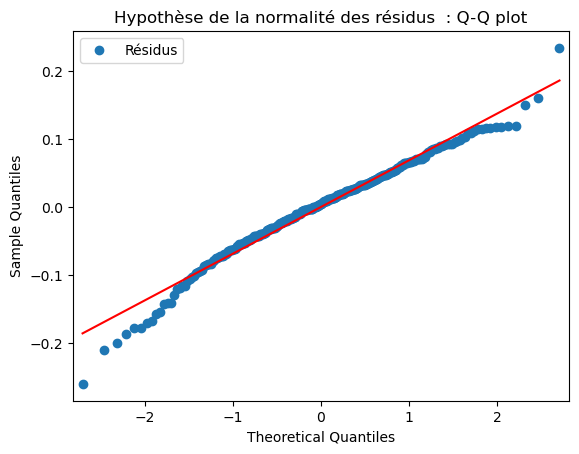

In [40]:
sm.qqplot(residuals, line='s', label="Résidus")
plt.title("Hypothèse de la normalité des résidus  : Q-Q plot")
plt.legend()
plt.show()

<b>Test de Shapiro-Wilk</b>

In [41]:
from scipy.stats import shapiro

statistic, p_value = shapiro(residuals)

if p_value > 0.05:
    print("Les résidus semblent suivre une distribution normale (hypothèse non rejetée).")
else:
    print("Les résidus ne suivent pas une distribution normale (hypothèse rejetée).")


Les résidus ne suivent pas une distribution normale (hypothèse rejetée).


Conclusion des vérification des hypothèses de la régression linéaire : 
- Linéarité : <b><span style="color:green">VERIFIÉ</span></b>
- Indépendance des résidus : <b><span style="color:orange">VERIFIÉ par les tests statistiques mais pas par le graphqiue</span></b>
- Homogénéité des résidus : <b><span style="color:red">NON VERIFIÉ</span></b>
- Normalité des résidus : <b><span style="color:green">VERIFIÉ</span></b>

En résumé, bien que la linéarité et la normalité des résidus soient vérifiées, les violations de l'indépendance des résidus et de l'homogénéité des résidus peuvent remettre en question l'utilisation directe de la régression linéaire.

-----------------------

In [42]:
# On définit nos valeurs X et y
X = data_vide.drop(["margin_low","height_left","height_right","length","diagonal","margin_up"], axis=1)
X = sm.add_constant(X)
y = data_vide["margin_low"].values.reshape(len(data_vide),1)

In [43]:
# On réalise la prédiction à l'aide du model créé avec StatModel
prediction = resultat.predict(X)

Maintenant que nous avons nos données dans un tableau, nous allons pouvoir les assigner à notre table data_vide

In [44]:
# On assigne les données prédites à notre dataframe avec les valeurs vides
new_data = data_vide.assign(margin_low=prediction)
new_data.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72            1  5.152945     4.652912      4.648708    1.631702   1.446919   
99            1  5.152887     4.654627      4.655673    1.631702   1.420696   
151           1  5.153696     4.652054      4.657573    1.631702   1.391282   
197           1  5.150107     4.650717      4.652054    1.631702   1.530395   
241           1  5.152308     4.655293      4.654532    1.631702   1.391282   

       length  
72   4.734355  
99   4.736900  
151  4.735584  
197  4.738564  
241  4.730569

Afin de vérifier la cohérence des résultats obtenus. Nous allons vérifier quelques informations sur ces données

In [45]:
print("Avec la prédiction du model de Régression Linéaire")
display(new_data[["margin_low"]].describe())
print("Sans la prédiction du model de Régression Linéaire")
display(data_non_vide[["margin_low"]].describe())

Avec la prédiction du model de Régression Linéaire


margin_low
count   36.000000
mean     1.676441
std      0.084887
min      1.631702
25%      1.631702
50%      1.631702
75%      1.631702
max      1.833029

Sans la prédiction du model de Régression Linéaire


margin_low
count  1457.000000
mean      1.695267
std       0.116779
min       1.381282
25%       1.611436
50%       1.669592
75%       1.769855
max       2.066863

On peut constater deux points : 
- La moyenne du "margin_low" est un peu plus faible avec les données prédites
- L'écart type est plus faible avec les données prédites

On va pouvoir désormais fusionner nos tables Data_non_vide et New_Data

In [46]:
data = data_non_vide.append(new_data)

In [47]:
my_first_analyse(data)

observations  variables     type  moyennes  medianes  \
is_genuine            1493          7    int64  0.665104  1.000000   
diagonal              1493          7  float64  5.153047  5.153060   
height_left           1493          7  float64  4.654243  4.654341   
height_right          1493          7  float64  4.653204  4.653198   
margin_low            1493          7  float64  1.694813  1.669592   
margin_up             1493          7  float64  1.422113  1.420696   
length                1493          7  float64  4.733320  4.735848   

              ecart_types       min       max  nb_valeurs_manquantes  \
is_genuine       0.472112  0.000000  1.000000                      0   
diagonal         0.001752  5.147727  5.159113                      0   
height_left      0.002838  4.645736  4.662306                      0   
height_right     0.003076  4.643910  4.662967                      0   
margin_low       0.116128  1.381282  2.066863                      0   
margin_up        0.055536  1.269761  1.591274                      0   
length           0.007708  4.704925  4.748751                      0   

              %_valeurs_manquantes  
is_genuine                     0.0  
diagonal                       0.0  
height_left                    0.0  
height_right                   0.0  
margin_low                     0.0  
margin_up                      0.0  
length                         0.0

En combiant de nouveau nos données. On s'apperçoit désormais que les données n'ont pas beaucoup bougé avec l'ajout des informations manquantes dans margin_low. C'est une bonne nouvelle, cela signifie que les données semblent pertinentes.

# Prédiction des billets

Pour la mise en palce d'un modele capable de prédire au mieux si un billet et vrai ou faux, nous allons tester plusieurs méthodes : 
- KNeighborsClassifier
- LogisticRegression

## KNeighborsClassifier (KNN)

In [48]:
# On importe KNeighborsClassifier de SKlearn
from sklearn.neighbors import KNeighborsClassifier 

In [49]:
# On affecte à nos X et y les données nécessaires
X = data.drop("is_genuine", axis=1)
y = data["is_genuine"]

In [50]:
# On créé nos DataSet de train et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

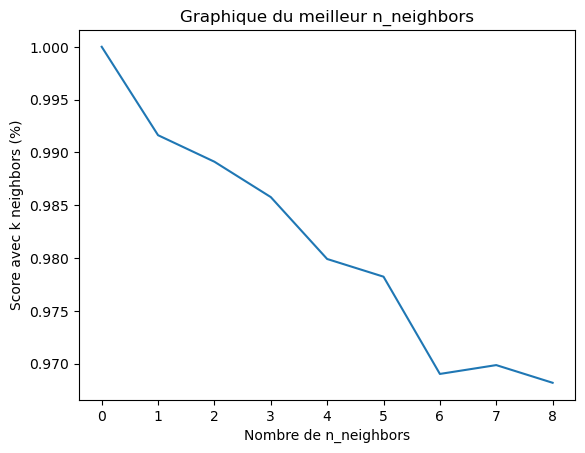

In [51]:
# On vérifie pour le KNeighborsClassifier quel est le meilleur nombre de neighbors
score = []
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    score.append(model.score(X_train,y_train))
plt.plot(score)
plt.title("Graphique du meilleur n_neighbors")
plt.xlabel("Nombre de n_neighbors")
plt.ylabel("Score avec k neighbors (%)")
plt.show()

D'après notre graphqiue, nous pouvons en conclure que le meilleur k pour le KNeighborsClassifier() est de 1. Cependant, avec un k = 1, il y a de grande chance d'avoir un overfiting. Nous allons donc le vérifier.
On va tester l'overfiting pour:
- k=1
- k=3

In [52]:
# On met en place le model et on vérifie le score sur les données Test
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print("Train score:",model.score(X_train, y_train))
print("Test score:",model.score(X_test, y_test))

Train score: 0.9891122278056952
Test score: 0.9732441471571907


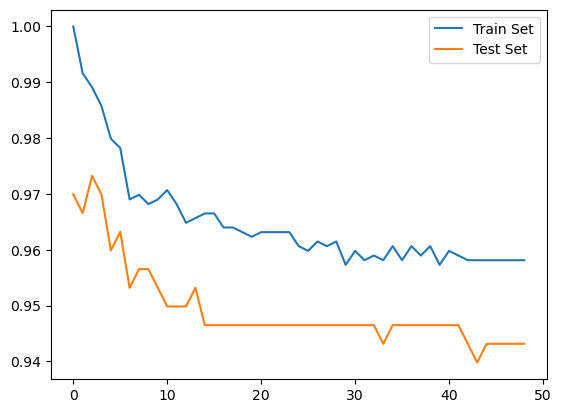

In [53]:
# On test pour plusieurs k (de 1 à 50)
train_score=[]
test_score=[]

for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    
plt.plot(train_score, label="Train Set")
plt.plot(test_score, label="Test Set")
plt.legend()
plt.show()

### Validation Curve

In [54]:
from sklearn.model_selection import validation_curve

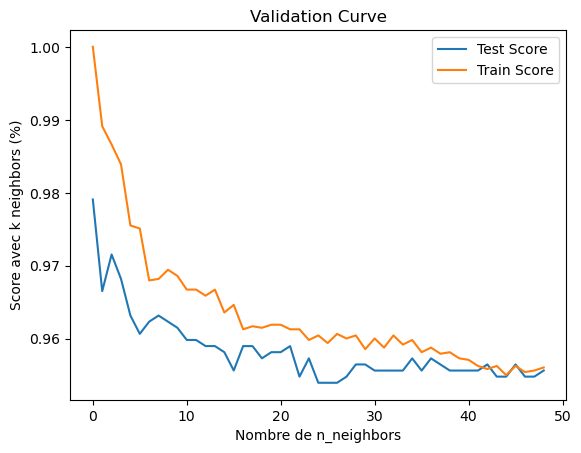

In [55]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, test_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k , cv=5)

plt.plot(test_score.mean(axis=1), label="Test Score")
plt.plot(train_score.mean(axis=1), label="Train Score")
plt.xlabel("Nombre de n_neighbors")
plt.ylabel("Score avec k neighbors (%)")
plt.title("Validation Curve")
plt.legend()
plt.show()

### GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# On définit les paramètres à tester
param = {
    "n_neighbors" : np.arange(1,50),
    "weights" : ["uniform","distance"],
    "algorithm" : ['auto','ball_tree', 'kd_tree', 'brute'] 
}

# On ajoute notre GridSearchCV a une variable
grid = GridSearchCV(KNeighborsClassifier(),param,cv=5)

In [58]:
# On entraine notre GridSerachCV avec nos données d'entrainement
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [59]:
# On regarde quelle a été le meilleur score obtenu en croisant les différents paramètres
grid.best_score_

0.9790654337048628

In [60]:
# On fait apparaitre les meilleurs paramètres qui ont donnés le score au dessus
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [61]:
# On enregistre les paramètres dans une variable model. Cela nous permettra de réutiliser ses paramètres pour tester nos données Test
model = grid.best_estimator_

In [62]:
# On vérifie le score de notre model optimisé avec les données Test
model.score(X_test, y_test)

0.9698996655518395

### Matrice de confusion

Afin d'avoir une meilleur vue sur l'exactitude de nos résultats. Nous pouvons réaliser une matrice de confusion. Cette matrice va nous permettre de voir les résultats de notre model vs la réalité (voir faux-positif et faux-négatif)

In [63]:
# On importe les librairies nécessaire pour réaliser une matrice de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

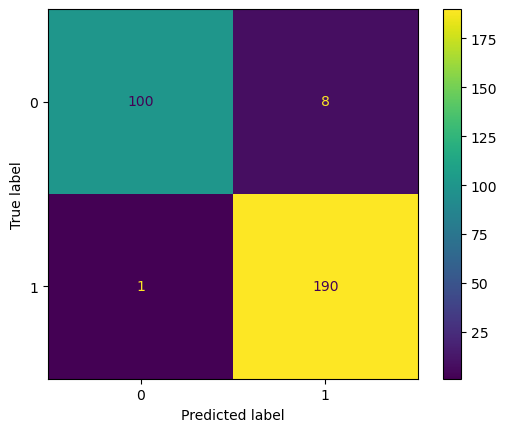

In [64]:
# On réalise notre matrice de confusion
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Maintenant que nous avons réalisé notre model et tester ses résultats. Nous pouvons nous demander si notre model pourrait devenir meilleur avec plus de données. Pour cela, nous allon tracer notre <b>Learning Curve</b>

### Learning Curve

In [65]:
# On importe la bibliothèque nécessaire à réaliser notre courbe d'apprentissage
from sklearn.model_selection import learning_curve

In [66]:
# On réalise notre Learning Curve
N, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 100), cv=5)

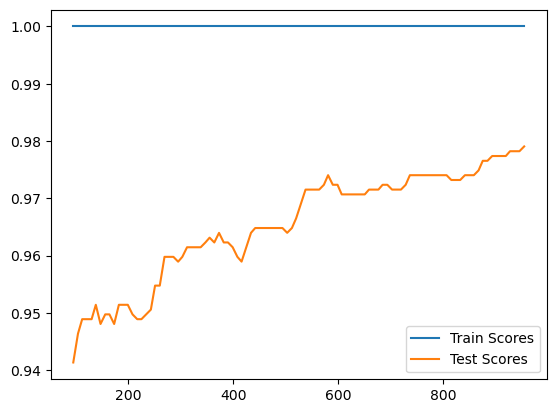

In [67]:
# On affiche graphiquement les résultats
plt.plot(N, train_scores.mean(axis=1), label="Train Scores")
plt.plot(N, test_scores.mean(axis=1), label="Test Scores")
plt.legend()
plt.show()

On constate que le Test Score augmente en fonction du nombre de données récolté. D'après le graphique, le model pourrait être plus performant avec plus de données.

## Régression Logistique

In [68]:
data = my_inverse_log(data, columns=["diagonal","height_left","height_right","margin_low","margin_up","length"])

In [69]:
# On affecte à nos X et y les données nécessaires
X = data.drop("is_genuine", axis=1)
y = data["is_genuine"]

In [70]:
# On importe la librairie nous permettant de faire une Régression Logistique
from sklearn.linear_model import LogisticRegression

In [71]:
# On définit notre Train Set et notre Test Set
X_train ,X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [72]:
my_first_analyse(data_base)

observations  variables     type    moyennes  medianes  \
is_genuine            1493          7    int64    0.665104      1.00   
diagonal              1493          7  float64  171.957890    171.96   
height_left           1493          7  float64  104.030074    104.04   
height_right          1493          7  float64  103.921105    103.92   
margin_low            1493          7  float64    4.486225      4.31   
margin_up             1493          7  float64    3.152271      3.14   
length                1493          7  float64  112.675653    112.96   

              ecart_types     min     max  nb_valeurs_manquantes  \
is_genuine       0.472112    0.00    1.00                      0   
diagonal         0.302943  171.04  173.01                      0   
height_left      0.298061  103.14  104.88                      0   
height_right     0.322774  102.95  104.95                      0   
margin_low       0.664667    2.98    6.90                     36   
margin_up        0.230960    2.56    3.91                      0   
length           0.873434  109.49  114.44                      0   

              %_valeurs_manquantes  
is_genuine                    0.00  
diagonal                      0.00  
height_left                   0.00  
height_right                  0.00  
margin_low                    2.41  
margin_up                     0.00  
length                        0.00

In [73]:
# On entraine notre model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# On vérifie le score de notre model sur les données Test
model.score(X_test, y_test)

0.9933110367892977

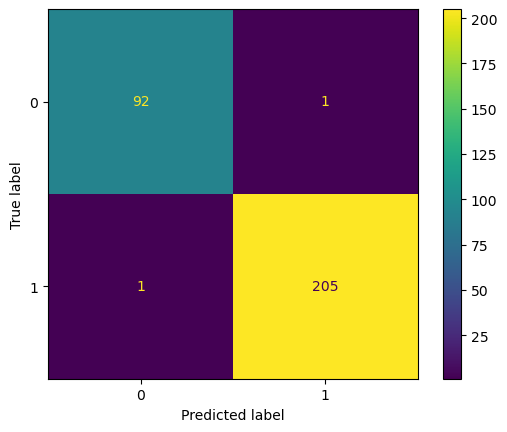

In [74]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [75]:
from sklearn.metrics import *

In [76]:
mean_absolute_error(y_test, y_pred)

0.006688963210702341

In [77]:
mean_squared_error(y_test, y_pred)

0.006688963210702341

In [78]:
median_absolute_error(y_test, y_pred)

0.0

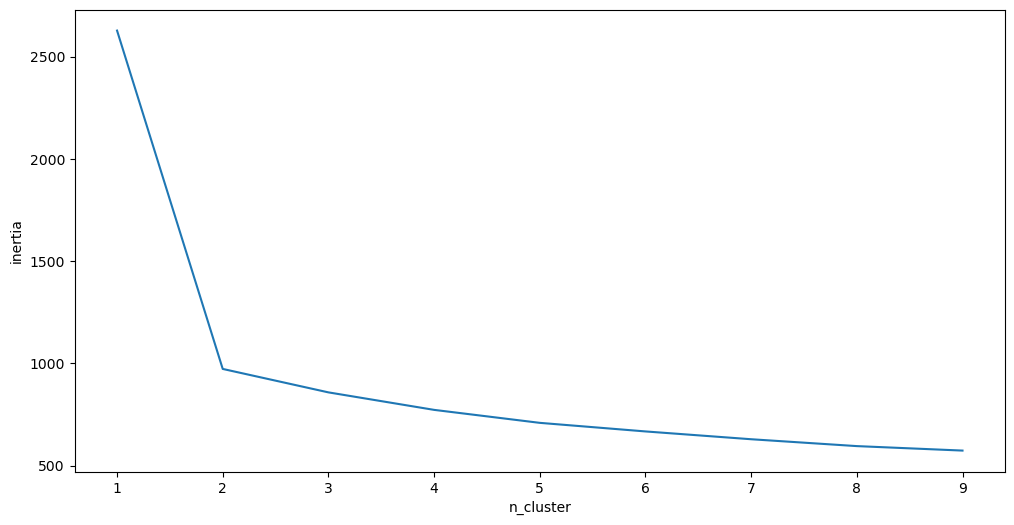

D'après la méthode du coude, le nombre de cluster optimal est : 2


2

In [79]:
my_kmeans_coude(data)

Le nombre optimal de cluster est : 2


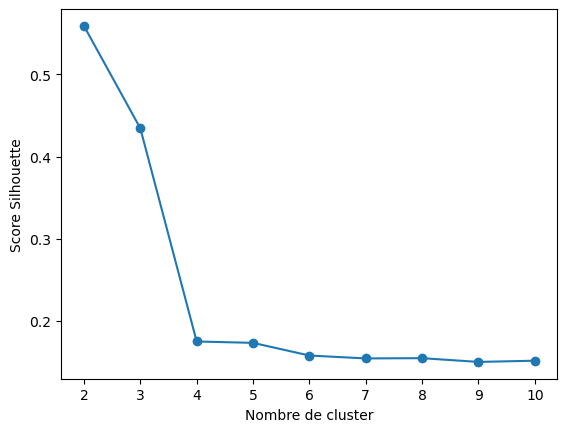

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [80]:
my_silhouette_method(data,10)

is_genuine    diagonal  height_left  height_right  margin_low  margin_up  \
0    0.000000  171.900163   104.191731    104.144236    5.232286   3.350102   
1    0.991018  171.986178   103.950858    103.811766    4.116319   3.055329   

       length  
0  111.607943  
1  113.198852

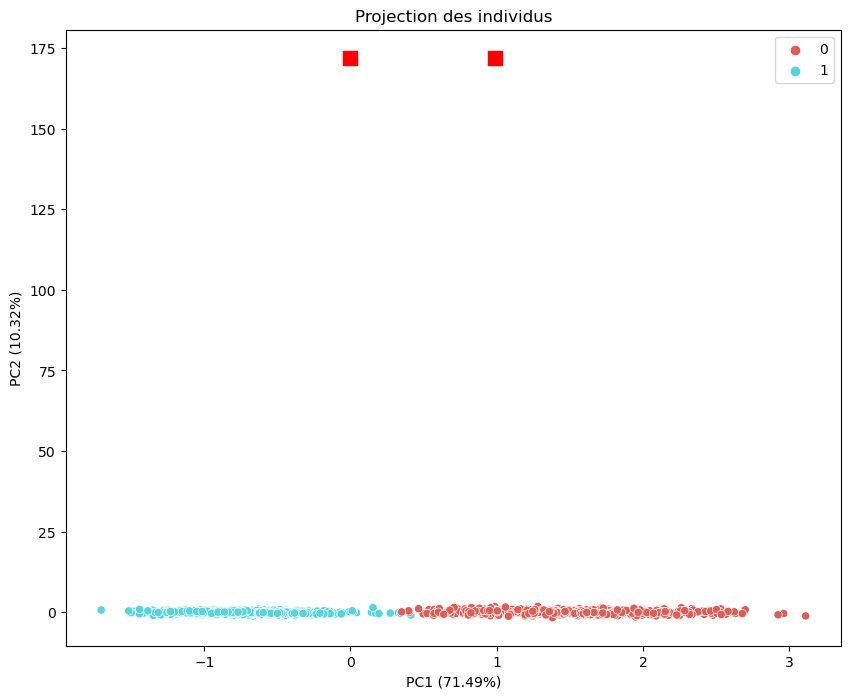

In [81]:
my_kmeans(data,2)

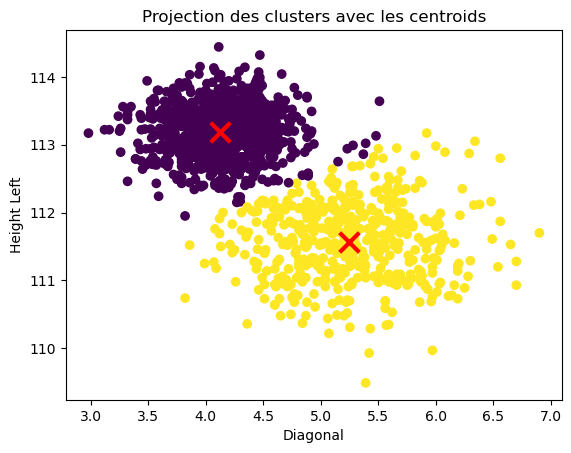

      is_genuine  predicted_label
1              1                0
2              1                0
3              1                0
4              1                0
5              1                0
...          ...              ...
1303           0                1
1315           0                1
1347           0                1
1435           0                1
1438           0                1

[1493 rows x 2 columns]


In [82]:
# Sélectionner les colonnes pertinentes pour la prédiction
features = ["margin_low", "length"]
X = data[features]

# Initialiser le modèle K-means
kmeans = KMeans(n_clusters=2, random_state=0)

# Entraîner le modèle sur les données
kmeans.fit(X)

# Obtenir les prédictions sur les données d'entraînement
predictions = kmeans.predict(X)

# Ajouter les prédictions au dataframe
data["predicted_label"] = predictions

# Obtenir les coordonnées des centroids
centroids = kmeans.cluster_centers_

# Afficher la projection des clusters avec les centroids
plt.scatter(X["margin_low"], X["length"], c=predictions, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=200, linewidths=3, color="r")
plt.xlabel("Diagonal")
plt.ylabel("Height Left")
plt.title("Projection des clusters avec les centroids")
plt.show()

# Afficher les résultats
print(data[["is_genuine", "predicted_label"]])

In [83]:
data

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1              1    171.46       103.36        103.66    3.770000       2.99   
2              1    172.69       104.48        103.50    4.400000       2.94   
3              1    171.36       103.91        103.94    3.620000       3.01   
4              1    171.73       104.28        103.46    4.040000       3.48   
5              1    172.17       103.74        104.08    4.420000       2.95   
...          ...       ...          ...           ...         ...        ...   
1303           0    172.17       104.49        103.76    5.252799       2.93   
1315           0    172.08       104.15        104.17    5.252799       3.40   
1347           0    171.72       104.46        104.12    5.252799       3.61   
1435           0    172.66       104.33        104.41    5.252799       3.56   
1438           0    171.90       104.28        104.29    5.252799       3.24   

      length  cluster  predicted_label  
1     113.09        1                0  
2     113.16        1                0  
3     113.51        1                0  
4     112.54        1                0  
5     112.81        1                0  
...      ...      ...              ...  
1303  111.21        0                1  
1315  112.29        0                1  
1347  110.31        0                1  
1435  111.47        0                1  
1438  111.49        0                1  

[1493 rows x 9 columns]

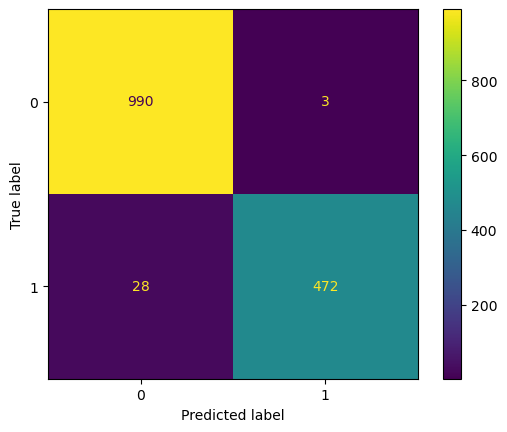

In [84]:
# On inverse les 0 et les 1 car le numéro du cluster n'a rien à voir avec la nature du billet. 
data["is_genuine"] = data["is_genuine"].replace({0: 1, 1: 0})

# On réalise notre matrice de confusion
y_pred = model.predict(X_test)

cm = confusion_matrix(data["is_genuine"], data['predicted_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [85]:
data.drop(["cluster","predicted_label"], axis=1, inplace=True)

Explained Variance Ratio : [71. 82.]


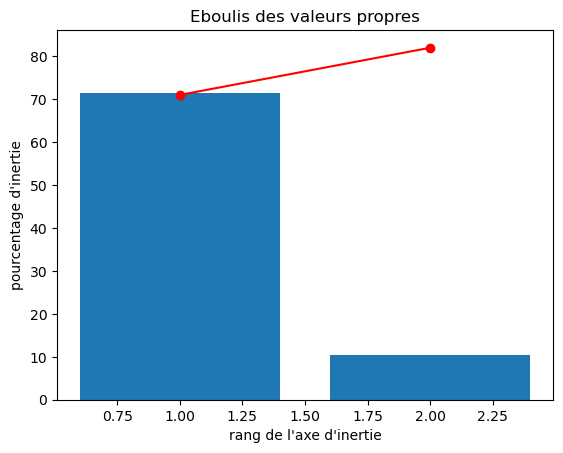

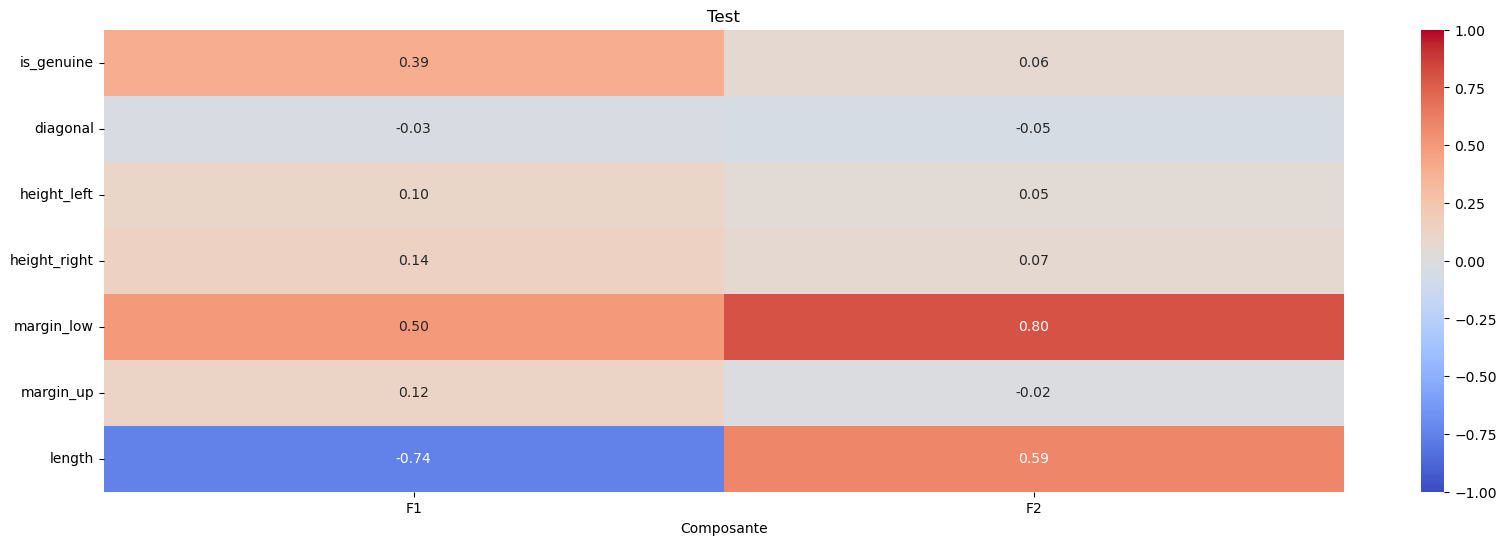

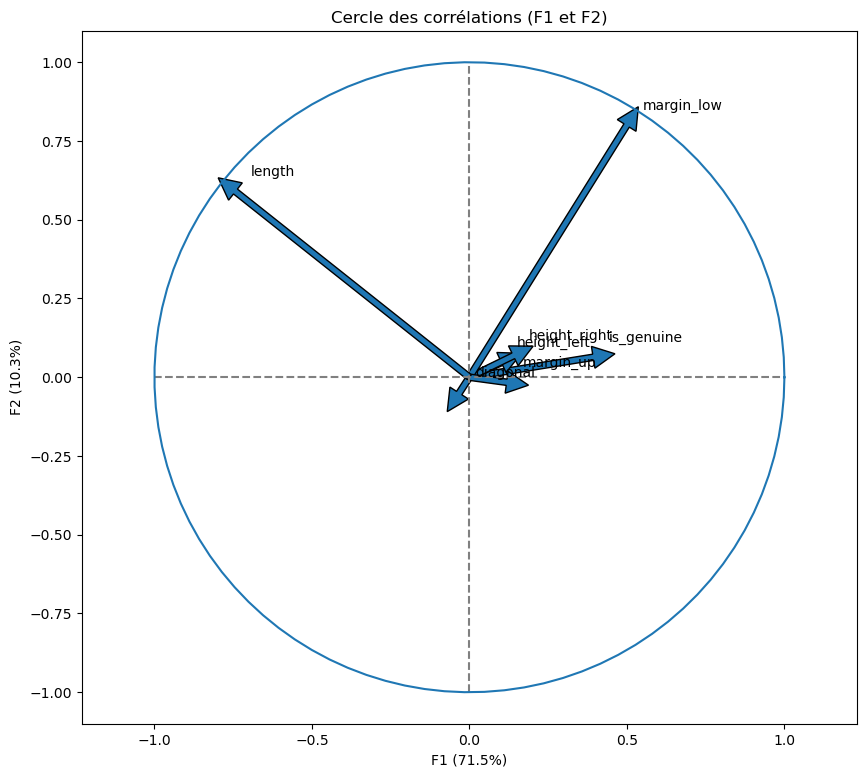

In [86]:
my_pca(2, data, (0,1))

In [87]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(data)

for i in range(0, 2): 
    data['PC' + str(i + 1)] = reduced[:, i]
data

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1              0    171.46       103.36        103.66    3.770000       2.99   
2              0    172.69       104.48        103.50    4.400000       2.94   
3              0    171.36       103.91        103.94    3.620000       3.01   
4              0    171.73       104.28        103.46    4.040000       3.48   
5              0    172.17       103.74        104.08    4.420000       2.95   
...          ...       ...          ...           ...         ...        ...   
1303           1    172.17       104.49        103.76    5.252799       2.93   
1315           1    172.08       104.15        104.17    5.252799       3.40   
1347           1    171.72       104.46        104.12    5.252799       3.61   
1435           1    172.66       104.33        104.41    5.252799       3.56   
1438           1    171.90       104.28        104.29    5.252799       3.24   

      length       PC1       PC2  
1     113.09 -0.903009 -0.368440  
2     113.16 -0.594675  0.156687  
3     113.51 -1.189264 -0.191291  
4     112.54 -0.244918 -0.468920  
5     112.81 -0.301103 -0.002804  
...      ...       ...       ...  
1303  111.21  1.725171 -0.203571  
1315  112.29  1.004116  0.442161  
1347  110.31  2.535670 -0.699301  
1435  111.47  1.664994 -0.048305  
1438  111.49  1.615136 -0.003643  

[1493 rows x 9 columns]

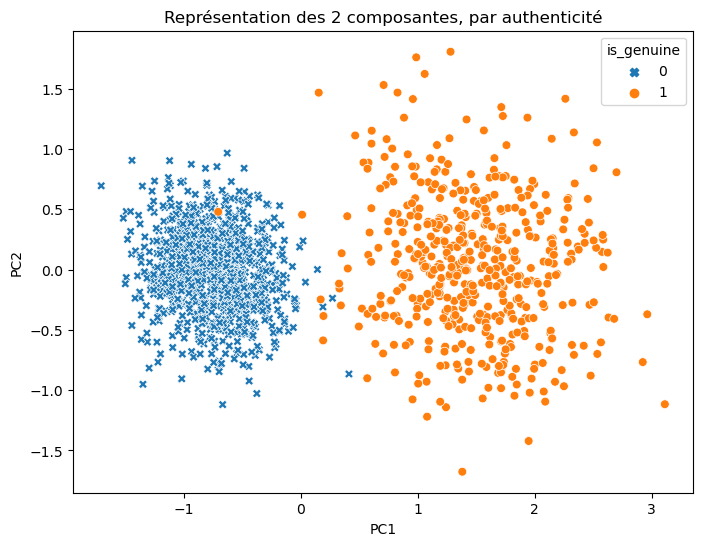

In [88]:
plt.figure(figsize=(8, 6))
scatter_markers = ['X','o']
sns.scatterplot(data=data, x='PC1', y='PC2', style='is_genuine', hue='is_genuine', markers=scatter_markers, s=40)
plt.title('Représentation des 2 composantes, par authenticité')
plt.show()